In [78]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report,accuracy_score,recall_score,precision_score,f1_score

from keras.models import Sequential
from keras.layers import LSTM,Dense,Dropout

In [35]:
df = pd.read_csv("data 2.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [37]:
df.drop(['Unnamed: 32'],axis=1,inplace=True)

In [38]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [39]:
mapping = {'M':1 ,"B":0}
df['diagnosis'] = df['diagnosis'].map(mapping)


In [40]:
features = df.drop('diagnosis',axis=1)
target = df['diagnosis']

In [41]:
features.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


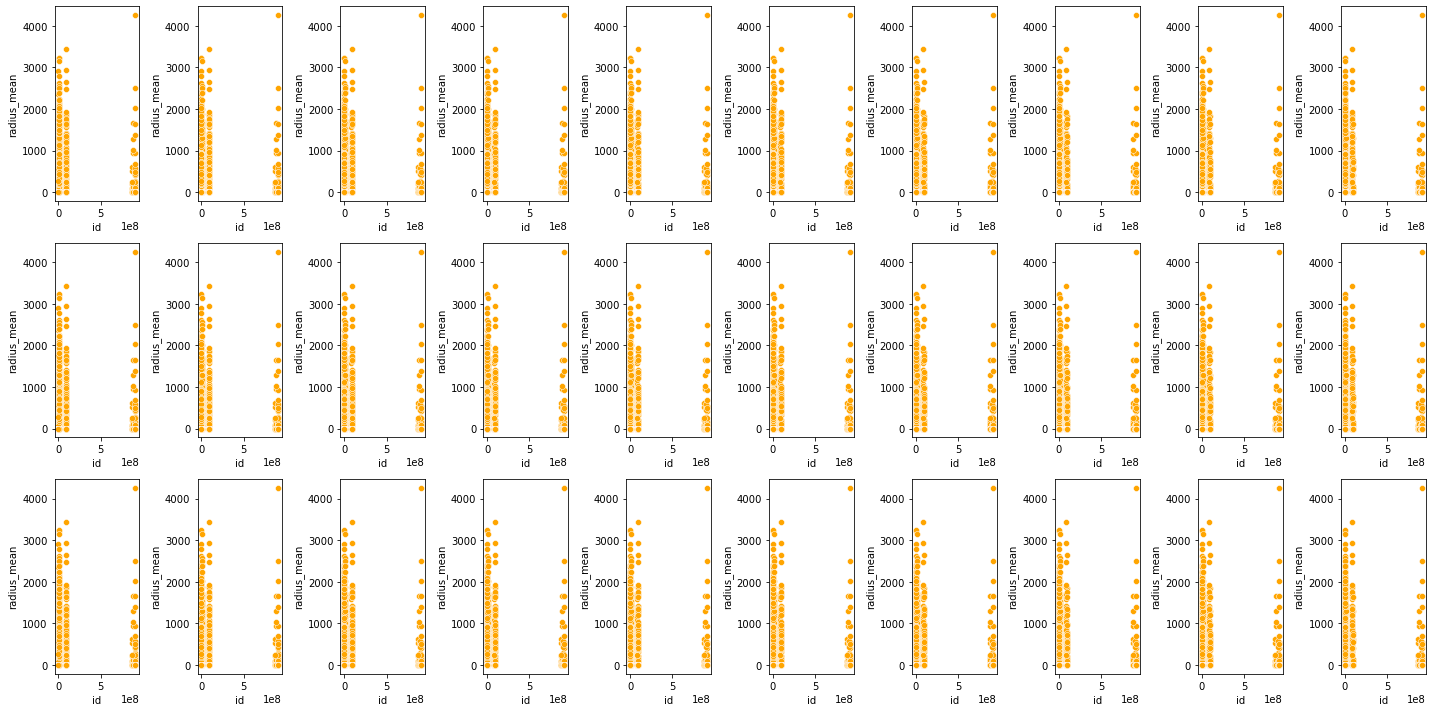

In [62]:
fig, ax= plt.subplots(nrows=3,ncols = 10, figsize= (20,10))

for i in features.columns[1:]:
    for j in range(3):
        for k in range(10):
            sns.scatterplot(x='id', y=i, data=features, ax=ax[j][k], color= 'orange')
            plt.tight_layout()


In [68]:
features.set_index('id',inplace=True)
features.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [69]:
X_train , X_test , y_train , y_test = train_test_split(features,target,test_size=0.2,random_state=123)

In [72]:
scaller = MinMaxScaler(feature_range=(0,1))
xscalled = pd.DataFrame(data=scaller.fit_transform(X_train),columns=X_train.columns)
xtscalled = pd.DataFrame(data=scaller.transform(X_test),columns=X_test.columns)

In [73]:
xscalled

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0.354176,0.440830,0.353434,0.197837,0.495351,0.673565,0.464152,0.328926,0.668687,0.536226,...,0.277837,0.666397,0.278849,0.141860,0.499675,0.994188,0.677955,0.608935,0.709836,0.759240
1,0.561133,0.398962,0.533925,0.395122,0.376185,0.221355,0.270150,0.340308,0.319192,0.153960,...,0.519032,0.510121,0.474077,0.345262,0.450581,0.205929,0.316693,0.473883,0.304356,0.178535
2,0.255834,0.128374,0.244497,0.135101,0.256838,0.162214,0.160239,0.125944,0.295960,0.243892,...,0.184988,0.183536,0.185467,0.084718,0.133637,0.223366,0.245687,0.314089,0.219200,0.281451
3,0.430501,0.433564,0.432604,0.271092,0.567572,0.466290,0.499766,0.471123,0.523232,0.491786,...,0.436144,0.486100,0.397878,0.267106,0.732149,0.502141,0.587540,0.698969,0.336882,0.594778
4,0.254367,0.128028,0.233806,0.134846,0.223075,0.017623,0.026312,0.025104,0.309596,0.137532,...,0.175027,0.107422,0.155336,0.080589,0.115587,0.011234,0.032875,0.063643,0.143505,0.045185
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450,0.225990,0.085121,0.213472,0.114146,0.335831,0.152869,0.098313,0.166501,0.282828,0.334035,...,0.182497,0.126046,0.162110,0.080441,0.426034,0.158535,0.153514,0.290344,0.237926,0.275687
451,0.287636,0.101730,0.272727,0.153256,0.548614,0.193917,0.089035,0.168986,0.243939,0.311710,...,0.217360,0.231849,0.211116,0.101824,0.509783,0.201010,0.143051,0.396907,0.161049,0.258477
452,0.248006,0.426990,0.244288,0.129077,0.150943,0.253371,0.186106,0.148012,0.072222,0.350253,...,0.165066,0.437787,0.184023,0.074518,0.028157,0.310888,0.232588,0.375258,0.123398,0.325958
453,0.658496,0.394464,0.628957,0.487593,0.350907,0.271558,0.229592,0.386928,0.281818,0.118155,...,0.582711,0.374629,0.551771,0.391958,0.350949,0.217218,0.215815,0.606529,0.205795,0.104357


In [75]:
xtscalled

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0.208865,0.152249,0.192789,0.104560,0.274713,0.056695,0.002281,0.014617,0.360101,0.228517,...,0.171825,0.258300,0.157727,0.075575,0.234712,0.061109,0.004407,0.057285,0.246403,0.162258
1,0.135085,0.183045,0.123751,0.062100,0.340706,0.063939,0.025843,0.069930,0.515657,0.277169,...,0.100320,0.226451,0.088052,0.041781,0.452025,0.056370,0.032292,0.177285,0.251528,0.226433
2,0.516610,0.309343,0.498288,0.342778,0.334477,0.292568,0.242737,0.372167,0.225253,0.104254,...,0.444326,0.360324,0.443697,0.258995,0.389936,0.333915,0.280192,0.666323,0.268677,0.200322
3,0.294975,0.409689,0.267067,0.162418,0.089194,-0.022327,0.003737,0.009205,0.169192,0.050126,...,0.215937,0.446154,0.188107,0.104109,-0.020504,-0.010004,0.006371,0.031818,0.143899,0.028739
4,0.561622,0.281661,0.540214,0.395122,0.416268,0.247099,0.312793,0.437127,0.541414,0.216091,...,0.533618,0.409987,0.506948,0.348457,0.402209,0.185138,0.252157,0.564261,0.419870,0.260682
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,0.285190,0.092734,0.262036,0.154952,0.313803,0.035246,0.021539,0.066103,0.205051,0.239469,...,0.202775,0.098785,0.180736,0.094745,0.231824,0.012497,0.022029,0.137113,0.042973,0.153866
110,0.134009,0.271280,0.118370,0.061336,0.152298,-0.009595,0.000000,0.000000,0.299495,0.305602,...,0.072501,0.225101,0.058967,0.029149,-0.093278,-0.017862,0.000000,0.000000,0.067810,0.089437
111,0.304271,0.243945,0.281881,0.168865,0.176221,0.058765,0.101593,0.054920,0.215657,0.134583,...,0.213803,0.413765,0.188605,0.102438,0.187784,0.120195,0.183546,0.170790,0.236941,0.143608
112,0.237732,0.296194,0.221648,0.120679,0.325720,0.133271,0.062535,0.069235,0.238889,0.223463,...,0.191035,0.337382,0.173365,0.088749,0.317017,0.161776,0.117492,0.237560,0.191208,0.211004


In [76]:
y_train.value_counts()

0    284
1    171
Name: diagnosis, dtype: int64

In [77]:
y_test.value_counts()

0    73
1    41
Name: diagnosis, dtype: int64

In [79]:
lg = LogisticRegression()
lg.fit(xscalled, y_train)
prediction = lg.predict(xtscalled)
f1=f1_score(y_test,prediction)
acc=accuracy_score(y_test,prediction)
pre=precision_score(y_test,prediction)
rec=recall_score(y_test,prediction)

m1=pd.DataFrame({'F1SCORE':f1,'ACCURACCY':acc,'PRECISION':pre,'RECALL':rec},index=['LogisticRegression'])

In [80]:
svc = SVC()
svc.fit(xscalled, y_train)
prediction = svc.predict(xtscalled)
f1=f1_score(y_test,prediction)
acc=accuracy_score(y_test,prediction)
pre=precision_score(y_test,prediction)
rec=recall_score(y_test,prediction)

m2=pd.DataFrame({'F1SCORE':f1,'ACCURACCY':acc,'PRECISION':pre,'RECALL':rec},index=['SVC'])

In [81]:
tree = DecisionTreeClassifier()
tree.fit(xscalled, y_train)
prediction = tree.predict(xtscalled)
f1=f1_score(y_test,prediction)
acc=accuracy_score(y_test,prediction)
pre=precision_score(y_test,prediction)
rec=recall_score(y_test,prediction)

m3=pd.DataFrame({'F1SCORE':f1,'ACCURACCY':acc,'PRECISION':pre,'RECALL':rec},index=['DECISION_TREE'])

In [82]:
forest = RandomForestClassifier()
forest.fit(xscalled, y_train)
prediction = forest.predict(xtscalled)
f1=f1_score(y_test,prediction)
acc=accuracy_score(y_test,prediction)
pre=precision_score(y_test,prediction)
rec=recall_score(y_test,prediction)

m4=pd.DataFrame({'F1SCORE':f1,'ACCURACCY':acc,'PRECISION':pre,'RECALL':rec},index=['RANDOM_FOREST'])

In [83]:
xgb = XGBClassifier()
xgb.fit(xscalled, y_train)
prediction = xgb.predict(xtscalled)
f1=f1_score(y_test,prediction)
acc=accuracy_score(y_test,prediction)
pre=precision_score(y_test,prediction)
rec=recall_score(y_test,prediction)

m5=pd.DataFrame({'F1SCORE':f1,'ACCURACCY':acc,'PRECISION':pre,'RECALL':rec},index=['XGB'])

In [84]:
knn = KNeighborsClassifier()
knn.fit(xscalled, y_train)
prediction = knn.predict(xtscalled)
f1=f1_score(y_test,prediction)
acc=accuracy_score(y_test,prediction)
pre=precision_score(y_test,prediction)
rec=recall_score(y_test,prediction)

m6=pd.DataFrame({'F1SCORE':f1,'ACCURACCY':acc,'PRECISION':pre,'RECALL':rec},index=['KnEighbors'])

In [85]:
model = Sequential()
model.add(Dense(10,activation='relu'))
model.add(Dense(5,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='adam',loss='BinaryCrossentropy')

In [86]:
model.fit(xscalled,y_train,batch_size=8,epochs=200)


Epoch 1/200
57/57 [==============================] - 1s 1ms/step - loss: 0.6672
Epoch 2/200
57/57 [==============================] - 0s 1ms/step - loss: 0.6135
Epoch 3/200
57/57 [==============================] - 0s 1ms/step - loss: 0.5485
Epoch 4/200
57/57 [==============================] - 0s 1ms/step - loss: 0.4687
Epoch 5/200
57/57 [==============================] - 0s 1ms/step - loss: 0.3921
Epoch 6/200
57/57 [==============================] - 0s 1ms/step - loss: 0.3219
Epoch 7/200
57/57 [==============================] - 0s 1ms/step - loss: 0.2727
Epoch 8/200
57/57 [==============================] - 0s 1ms/step - loss: 0.2371
Epoch 9/200
57/57 [==============================] - 0s 1ms/step - loss: 0.2124
Epoch 10/200
57/57 [==============================] - 0s 2ms/step - loss: 0.1971
Epoch 11/200
57/57 [==============================] - 0s 2ms/step - loss: 0.1778
Epoch 12/200
57/57 [==============================] - 0s 2ms/step - loss: 0.1656
Epoch 13/200
57/57 [=================

57/57 [==============================] - 0s 1ms/step - loss: 0.0501
Epoch 103/200
57/57 [==============================] - 0s 2ms/step - loss: 0.0460
Epoch 104/200
57/57 [==============================] - 0s 1ms/step - loss: 0.0484
Epoch 105/200
57/57 [==============================] - 0s 1ms/step - loss: 0.0458
Epoch 106/200
57/57 [==============================] - 0s 1ms/step - loss: 0.0485
Epoch 107/200
57/57 [==============================] - 0s 1ms/step - loss: 0.0482
Epoch 108/200
57/57 [==============================] - 0s 1ms/step - loss: 0.0468
Epoch 109/200
57/57 [==============================] - 0s 2ms/step - loss: 0.0458
Epoch 110/200
57/57 [==============================] - 0s 1ms/step - loss: 0.0472
Epoch 111/200
57/57 [==============================] - 0s 1ms/step - loss: 0.0451
Epoch 112/200
57/57 [==============================] - 0s 1ms/step - loss: 0.0474
Epoch 113/200
57/57 [==============================] - 0s 1ms/step - loss: 0.0452
Epoch 114/200
57/57 [=========

In [87]:
prediction = model.predict(xtscalled)
pp=np.round(prediction,1)
PREDICTION = []
for x in pp:
    if x >=0.5:
        x=1
        PREDICTION.append(x)
    else:
        x=0
        PREDICTION.append(x)
PREDICTION= np.array(PREDICTION)

4/4 [==============================] - 0s 2ms/step


In [88]:
f1=f1_score(y_test,PREDICTION)
acc=accuracy_score(y_test,PREDICTION)
pre=precision_score(y_test,PREDICTION)
rec=recall_score(y_test,PREDICTION)
m7=pd.DataFrame({'F1SCORE':f1,'ACCURACCY':acc,'PRECISION':pre,'RECALL':rec},index=['NN'])

In [93]:
n_estimators=[int(x) for x in np.linspace(10,1000,10)]
max_depth=[int(x) for x in np.linspace(1,2000,20)]
min_samples_split=[2,5,10]
min_samples_leaf=[1,2,5]
max_features=['auto','sqrt','log2']
bootstrap=[True,False]
params={
    'n_estimators':n_estimators,
    'max_depth':max_depth,
    'min_samples_split':min_samples_split,
    'min_samples_leaf':min_samples_leaf,
    'max_features':max_features,
    'bootstrap':bootstrap
}

In [94]:
fr = RandomForestClassifier()
gforest = RandomizedSearchCV(estimator=fr,param_distributions=params,n_iter=100,cv=3,n_jobs=-1,verbose=2)
gforest.fit(xscalled,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [1, 106, 211, 316, 421,
                                                      527, 632, 737, 842, 947,
                                                      1053, 1158, 1263, 1368,
                                                      1473, 1579, 1684, 1789,
                                                      1894, 2000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 5],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [10, 120, 230, 340, 450,
                                                         560, 670, 780, 890,
         

In [95]:
pred = gforest.best_estimator_.predict(xtscalled)
f1=f1_score(y_test,pred)
acc=accuracy_score(y_test,pred)
pre=precision_score(y_test,pred)
rec=recall_score(y_test,pred)

m8=pd.DataFrame({'F1SCORE':f1,'ACCURACCY':acc,'PRECISION':pre,'RECALL':rec},index=['Tunned_RandomForest'])

In [96]:
max_depthX = [int(x) for x in np.linspace(start=2,stop=20,num=10)]
learning_rate = [float(x) for x in np.linspace(start=0.01,stop=0.3,num=10)]
n_estimatorsX = [int(x) for x in np.linspace(start=100,stop=1000,num=20)]
params = { 'max_depth': max_depthX,
           'learning_rate': learning_rate,
           'subsample': np.arange(0.5, 1.0, 0.1),
           'colsample_bytree': np.arange(0.4, 1.0, 0.1),
           'colsample_bylevel': np.arange(0.4, 1.0, 0.1),
           'n_estimators': n_estimatorsX
}



xgb_tunned = XGBClassifier()
grid_xgb = RandomizedSearchCV(estimator=xgb_tunned, param_distributions=params,verbose=2, n_iter=100,cv=3,n_jobs=-1)
grid_xgb.fit(xscalled,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                                          0.042222222222222223,
               

In [97]:
pred = grid_xgb.best_estimator_.predict(xtscalled)
f1=f1_score(y_test,pred)
acc=accuracy_score(y_test,pred)
pre=precision_score(y_test,pred)
rec=recall_score(y_test,pred)

m9=pd.DataFrame({'F1SCORE':f1,'ACCURACCY':acc,'PRECISION':pre,'RECALL':rec},index=['Tunned_XGB'])

In [98]:
result = pd.concat([m1,m2,m3,m4,m5,m6,m7,m8,m9],axis=0)
result

,F1SCORE,ACCURACCY,PRECISION,RECALL
LogisticRegression,0.948718,0.964912,1.000000,0.902439
SVC,0.975000,0.982456,1.000000,0.951220
DECISION_TREE,0.925000,0.947368,0.948718,0.902439
RANDOM_FOREST,0.987654,0.991228,1.000000,0.975610
XGB,0.950000,0.964912,0.974359,0.926829
KnEighbors,0.975000,0.982456,1.000000,0.951220
NN,0.987654,0.991228,1.000000,0.975610
Tunned_RandomForest,0.950000,0.964912,0.974359,0.926829
Tunned_XGB,0.962963,0.973684,0.975000,0.951220
